In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
sells_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/sells.csv'
buys_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/buys.csv'
stocks_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/stocks.csv'
dividends_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/dividends.csv'

sells = pd.read_csv(sells_url)
buys = pd.read_csv(buys_url)
stocks = pd.read_csv(stocks_url)
dividends = pd.read_csv(dividends_url)

In [8]:
pd.options.display.float_format = '{:,.2f}'.format
# Merge the dataframes
sales = sells.merge(buys, left_on='buy_id', right_on='id', suffixes=('_sell', '_buy'))
sales = sales.merge(stocks, left_on='stock_id', right_on='id', suffixes=('_sell', '_stock'))

# Display the merged dataframe
sales.head()

,buy_id,date_sell,year_sell,month_sell,price_sell,qty_sell,amt_sell,net_sell,profit,days,...,price_buy,qty_buy,amt_buy,net_buy,status,kind,id_stock,name,market,website
0,1177,2023-08-31,2023,8,10.60,10000,"106,000.00","105,765.22",532.66,471,...,10.50,10000,"105,000.00","105,232.56",Sold,DOS,172,WHART,SET999,NaN
1,1008,2021-09-21,2021,9,12.80,10000,"128,000.00","127,716.49","-5,578.09",7,...,13.30,10000,"133,000.00","133,294.58",Sold,SHT,172,WHART,SET999,NaN
2,997,2021-08-30,2021,8,13.70,4800,"65,760.00","65,614.35","1,632.95",3,...,13.30,4800,"63,840.00","63,981.40",Sold,SHT,172,WHART,SET999,NaN
3,994,2021-08-30,2021,8,13.60,5200,"70,720.00","70,563.36","1,250.18",3,...,13.30,5200,"69,160.00","69,313.18",Sold,SHT,172,WHART,SET999,NaN
4,976,2021-08-11,2021,8,13.60,10000,"136,000.00","135,698.77","4,408.62",6,...,13.10,10000,"131,000.00","131,290.15",Sold,SHT,172,WHART,SET999,NaN


### Sales Analysis

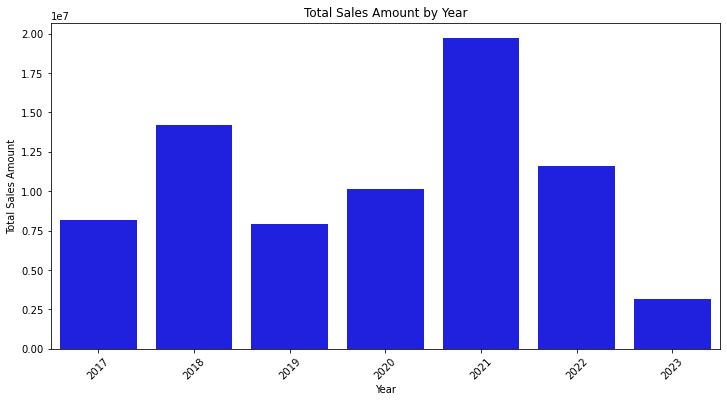

In [9]:
# Calculate the total sales amount by year
sales_amount_by_year = sales.groupby('year_sell')['amt_sell'].sum()

# Create a bar plot for the total sales amount by year
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_amount_by_year.index, y=sales_amount_by_year.values, color='blue')
plt.title('Total Sales Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

In [10]:
sales_amount_by_year.to_frame()

,amt_sell
year_sell,
2017,"8,142,490.00"
2018,"14,167,950.00"
2019,"7,897,675.00"
2020,"10,108,070.00"
2021,"19,712,845.00"
2022,"11,600,885.00"
2023,"3,152,060.00"


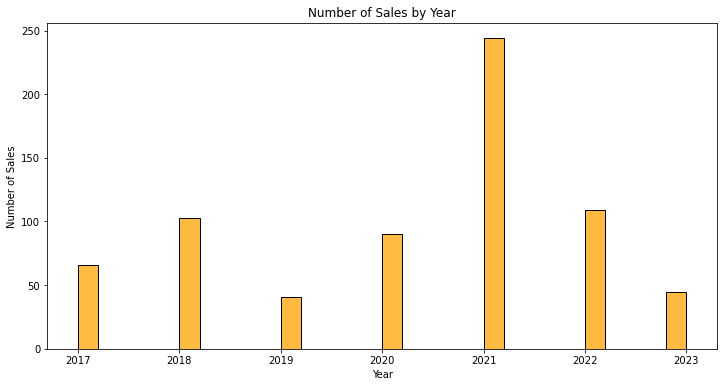

In [11]:
# Extract the year from the sell date
sales['date_sell'] = pd.to_datetime(sales['date_sell'])
sales['year'] = sales['date_sell'].dt.year

# Create a histogram for the number of sales by year
plt.figure(figsize=(12, 6))
sns.histplot(sales['year'], bins=30, color='orange', kde=False)
plt.title('Number of Sales by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.show()

In [12]:
yearly_sales = sales.groupby('year')['date_sell'].count()
yearly_sales

year
2017     66
2018    103
2019     41
2020     90
2021    244
2022    109
2023     45
Name: date_sell, dtype: int64

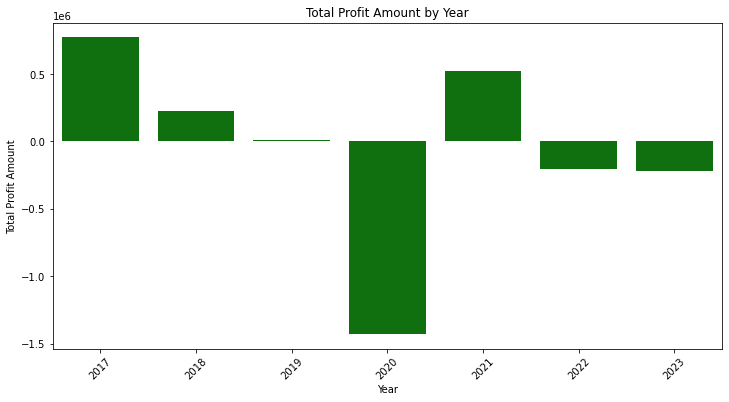

In [13]:
# Calculate the total sales amount by year
profit_amount_by_year = sales.groupby('year_sell')['profit'].sum()

# Create a bar plot for the total profit amount by year
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_amount_by_year.index, y=profit_amount_by_year.values, color='green')
plt.title('Total Profit Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Profit Amount')
plt.xticks(rotation=45)
plt.show()

In [14]:
profit_amount_by_year.to_frame()

,profit
year_sell,
2017,"772,818.01"
2018,"223,705.73"
2019,"11,250.02"
2020,"-1,428,227.86"
2021,"520,814.94"
2022,"-201,413.37"
2023,"-220,008.39"


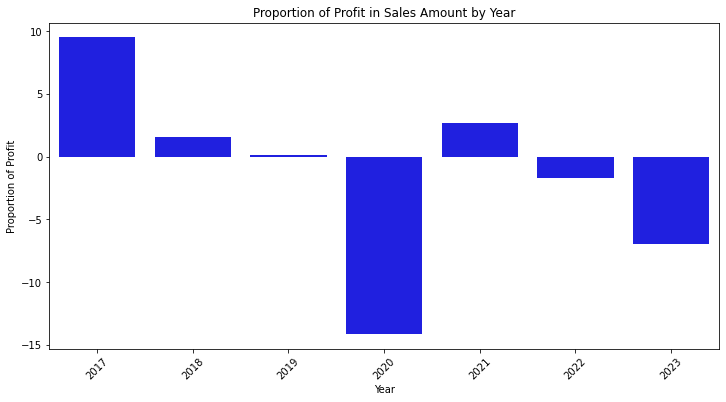

In [15]:
# Calculate the total profit by year
total_profit_by_year = sales.groupby('year_sell')['profit'].sum()

# Calculate the proportion of profit in sales amount by year
profit_proportion_by_year = (total_profit_by_year / sales_amount_by_year) * 100

# Create a bar plot for the proportion of profit in sales amount by year
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_proportion_by_year.index, y=profit_proportion_by_year.values, color='blue')
plt.title('Proportion of Profit in Sales Amount by Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Profit')
plt.xticks(rotation=45)
plt.show()

In [16]:
profit_proportion_by_year.to_frame().rename(columns={0: 'Profit Percent'})
#profit_percent_by_stock_2023_sorted.to_frame().reset_index().rename(columns={'name': 'Stock', 0: 'Profit Percent'})

,Profit Percent
year_sell,
2017,9.49
2018,1.58
2019,0.14
2020,-14.13
2021,2.64
2022,-1.74
2023,-6.98


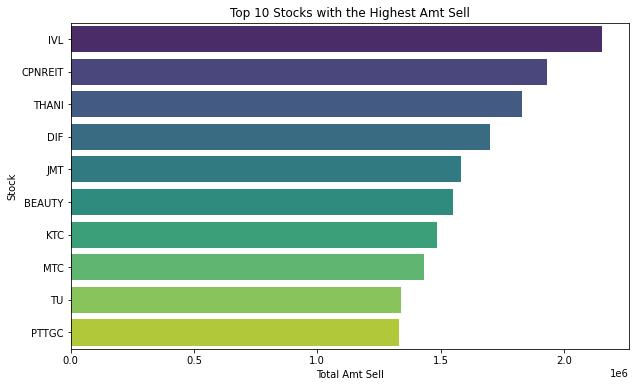

In [17]:
# Calculate the total amt sell per stock
total_amt_sell_per_stock = sales.groupby('name')['amt_sell'].sum().sort_values(ascending=False)

# Get the top 10 stocks with the highest total amt sell
top_10_stocks = total_amt_sell_per_stock.head(10)

# Create a bar plot for the top 10 stocks with the highest total amt sell
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stocks.values, y=top_10_stocks.index, palette='viridis')
plt.title('Top 10 Stocks with the Highest Amt Sell')
plt.xlabel('Total Amt Sell')
plt.ylabel('Stock')
plt.show()

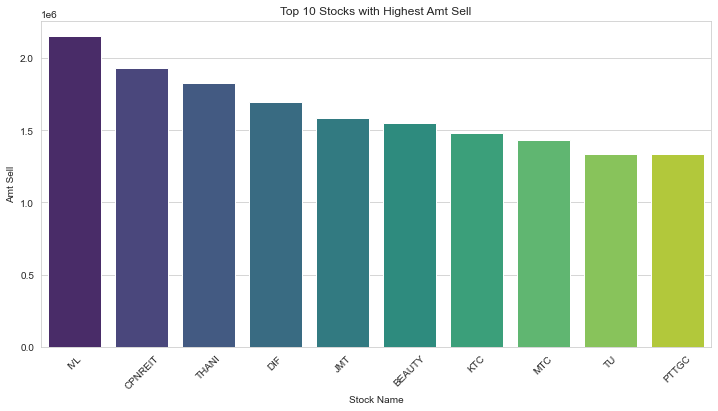

In [18]:
# Set the style of the visuals
sns.set_style('whitegrid')
# Calculate the total amt sell per stock
total_amt_sell_per_stock = sales.groupby('name')['amt_sell'].sum().sort_values(ascending=False)

# Get the top 10 stocks with the highest total amt sell
top_10_stocks = total_amt_sell_per_stock.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stocks.index, y=top_10_stocks.values, palette='viridis')
plt.title('Top 10 Stocks with Highest Amt Sell')
plt.xlabel('Stock Name')
plt.ylabel('Amt Sell')
plt.xticks(rotation=45)
plt.show()

In [19]:
top_10_stocks.to_frame()

,amt_sell
name,
IVL,"2,153,600.00"
CPNREIT,"1,929,400.00"
THANI,"1,827,500.00"
DIF,"1,698,400.00"
JMT,"1,582,075.00"
BEAUTY,"1,550,300.00"
KTC,"1,483,500.00"
MTC,"1,430,425.00"
TU,"1,338,200.00"


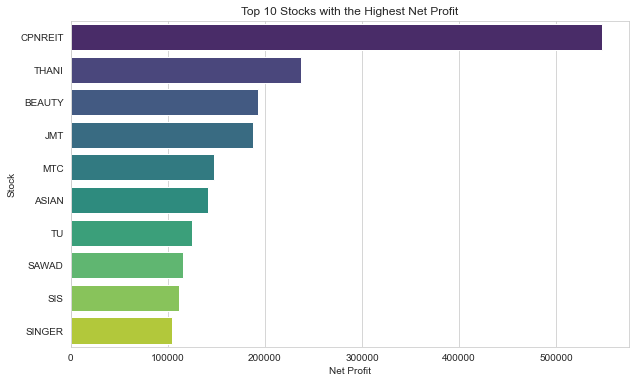

In [20]:
# Calculate the total net profit per stock
total_net_profit_per_stock = sales.groupby('name')['profit'].sum().sort_values(ascending=False)

# Get the top 10 stocks with the highest net profit
top_10_stocks = total_net_profit_per_stock.head(10)

# Create a bar plot for the top 10 stocks with the highest net profit
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stocks.values, y=top_10_stocks.index, palette='viridis')
plt.title('Top 10 Stocks with the Highest Net Profit')
plt.xlabel('Net Profit')
plt.ylabel('Stock')
plt.show()

In [21]:
top_10_stocks.to_frame()

,profit
name,
CPNREIT,"547,131.19"
THANI,"237,046.32"
BEAUTY,"192,974.08"
JMT,"187,296.16"
MTC,"147,177.71"
ASIAN,"141,685.61"
TU,"125,061.53"
SAWAD,"115,506.59"
SIS,"110,986.74"


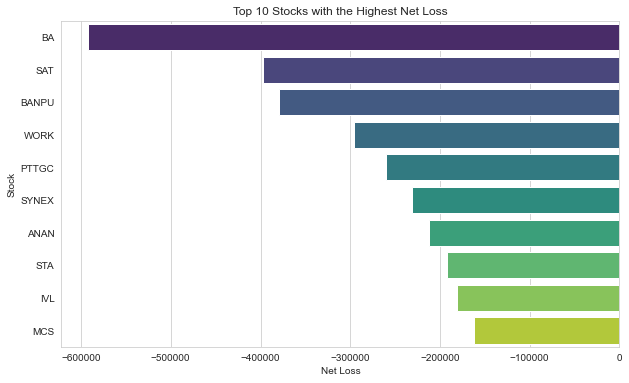

In [22]:
# Calculate the total net loss per stock
total_net_loss_per_stock = sales[sales['profit'] < 0].groupby('name')['profit'].sum().sort_values()

# Get the top 10 stocks with the highest net loss
top_10_stocks_with_highest_net_loss = total_net_loss_per_stock.head(10)

# Create a bar plot for the top 10 stocks with the highest net loss
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stocks_with_highest_net_loss.values, y=top_10_stocks_with_highest_net_loss.index, palette='viridis')
plt.title('Top 10 Stocks with the Highest Net Loss')
plt.xlabel('Net Loss')
plt.ylabel('Stock')
plt.show()

In [23]:
top_10_stocks_with_highest_net_loss.to_frame()

,profit
name,
BA,"-592,225.03"
SAT,"-397,317.50"
BANPU,"-378,993.43"
WORK,"-295,292.41"
PTTGC,"-260,539.98"
SYNEX,"-231,329.18"
ANAN,"-212,334.18"
STA,"-191,932.38"
IVL,"-181,457.70"


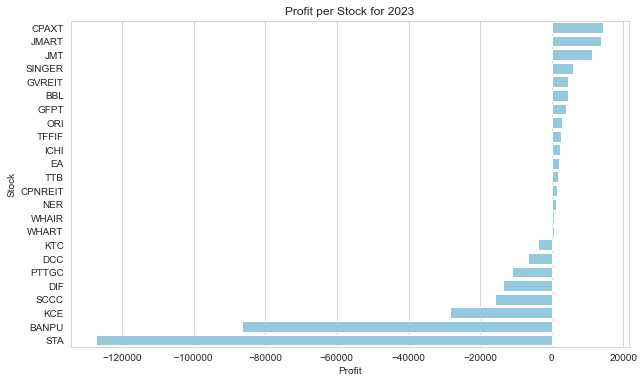

In [24]:
# Filter the sales for the year 2023
sales_2023 = sales[sales['year_sell'] == 2023]

# Calculate the average profit per stock for the year 2023
profit_per_stock_2023 = sales_2023.groupby('name')['profit'].sum().sort_values(ascending=False)

# Create a bar chart for the average profit per stock for the year 2023
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_per_stock_2023.values, y=profit_per_stock_2023.index, color='skyblue')
plt.title('Profit per Stock for 2023')
plt.xlabel('Profit')
plt.ylabel('Stock')
plt.show()

In [25]:
profit_per_stock_2023

name
CPAXT       14,372.89
JMART       13,740.08
JMT         11,340.18
SINGER       5,847.49
GVREIT       4,594.67
BBL          4,514.72
GFPT         4,074.74
ORI          2,857.81
TFFIF        2,482.22
ICHI         2,219.83
EA           2,092.91
TTB          1,687.04
CPNREIT      1,361.13
NER          1,095.46
WHAIR          656.69
WHART          532.66
KTC         -3,780.19
DCC         -6,773.43
PTTGC      -11,197.69
DIF        -13,516.74
SCCC       -15,875.76
KCE        -28,529.94
BANPU      -86,544.88
STA       -127,260.28
Name: profit, dtype: float64

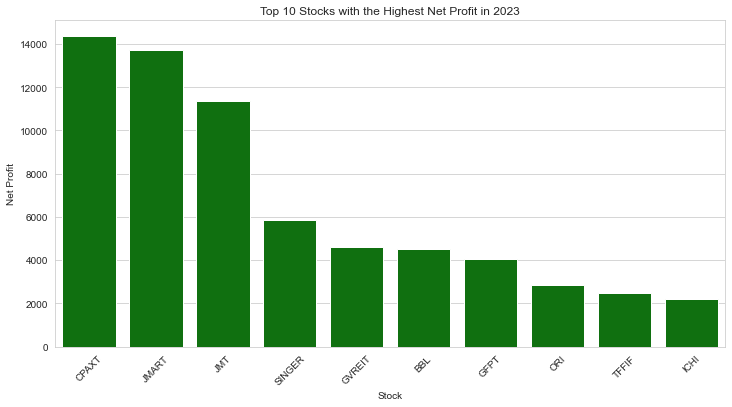

In [26]:
# Filter the sales data for the year 2023
sales_2023 = sales[sales['year_sell'] == 2023]
# Calculate the net profit for each stock in 2023
net_profit_by_stock_2023 = sales_2023.groupby('name')['profit'].sum()

# Get the top 10 stocks with the highest net profit in 2023
top_10_stocks_2023 = net_profit_by_stock_2023.nlargest(10)

# Create a bar plot for the top 10 stocks with the highest net profit in 2023
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stocks_2023.index, y=top_10_stocks_2023.values, color='green')
plt.title('Top 10 Stocks with the Highest Net Profit in 2023')
plt.xlabel('Stock')
plt.ylabel('Net Profit')
plt.xticks(rotation=45)
plt.show()

In [27]:
top_10_stocks_2023.to_frame()

,profit
name,
CPAXT,"14,372.89"
JMART,"13,740.08"
JMT,"11,340.18"
SINGER,"5,847.49"
GVREIT,"4,594.67"
BBL,"4,514.72"
GFPT,"4,074.74"
ORI,"2,857.81"
TFFIF,"2,482.22"


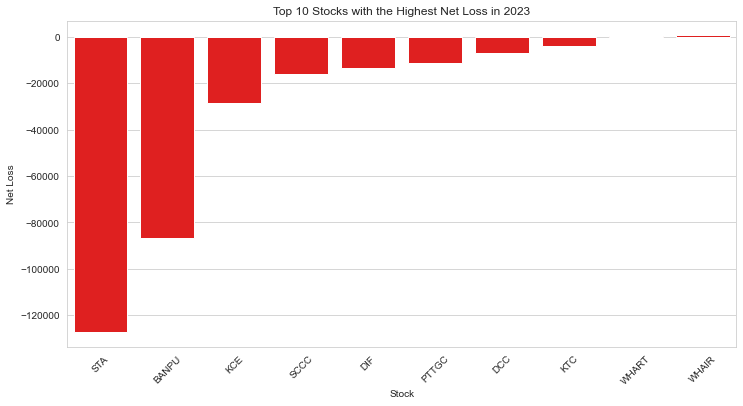

In [28]:
# Get the top 10 stocks with the highest net loss in 2023
top_10_stocks_loss_2023 = net_profit_by_stock_2023.nsmallest(10)

# Create a bar plot for the top 10 stocks with the highest net loss in 2023
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stocks_loss_2023.index, y=top_10_stocks_loss_2023.values, color='red')
plt.title('Top 10 Stocks with the Highest Net Loss in 2023')
plt.xlabel('Stock')
plt.ylabel('Net Loss')
plt.xticks(rotation=45)
plt.show()

In [29]:
top_10_stocks_loss_2023.to_frame()

,profit
name,
STA,"-127,260.28"
BANPU,"-86,544.88"
KCE,"-28,529.94"
SCCC,"-15,875.76"
DIF,"-13,516.74"
PTTGC,"-11,197.69"
DCC,"-6,773.43"
KTC,"-3,780.19"
WHART,532.66


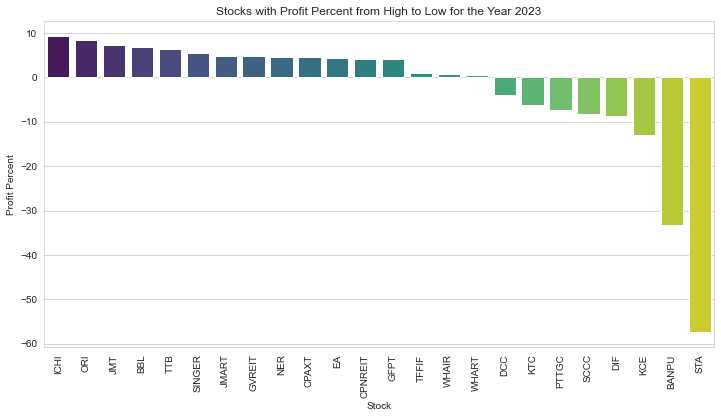

In [30]:
# Filter the sales data for the year 2023
sales_2023 = sales[sales['year_sell'] == 2023]
# Calculate the profit percent for each stock in 2023
profit_percent_by_stock_2023 = (sales_2023.groupby('name')['profit'].sum() / sales_2023.groupby('name')['amt_sell'].sum()) * 100

# Sort the stocks by profit percent from high to low
profit_percent_by_stock_2023_sorted = profit_percent_by_stock_2023.sort_values(ascending=False)

# Create a bar plot for the stocks with profit percent from high to low for the year 2023
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_percent_by_stock_2023_sorted.index, y=profit_percent_by_stock_2023_sorted.values, palette='viridis')
plt.title('Stocks with Profit Percent from High to Low for the Year 2023')
plt.xlabel('Stock')
plt.ylabel('Profit Percent')
plt.xticks(rotation=90)
plt.show()

In [31]:
# Display the profit percent by stock in 2023 in a table format
profit_percent_by_stock_2023_sorted.to_frame().rename(columns={0: 'Profit Percent'})

,Profit Percent
name,
ICHI,9.34
ORI,8.51
JMT,7.32
BBL,6.76
TTB,6.39
SINGER,5.55
JMART,4.94
GVREIT,4.89
NER,4.53


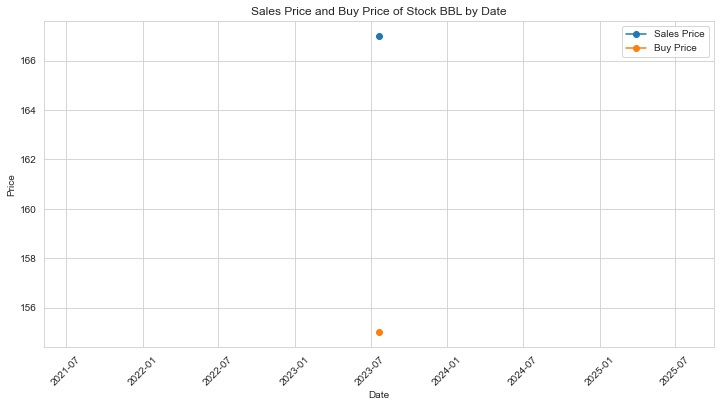

In [32]:
sales_BBL = sales[sales['name'] == 'BBL']
# Calculate the sales amount by date_sell
sales_price_by_date = sales_BBL.groupby('date_sell')['price_sell'].mean()
# Calculate the buy price by date_sell
buy_price_by_date = sales_BBL.groupby('date_sell')['price_buy'].mean()

# CrBBLte a line chart of sales amount and buy price by date_sell
plt.figure(figsize=(12, 6))
plt.plot(sales_price_by_date.index, sales_price_by_date.values, marker='o', label='Sales Price')
plt.plot(buy_price_by_date.index, buy_price_by_date.values, marker='o', label='Buy Price')
plt.title('Sales Price and Buy Price of Stock BBL by Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

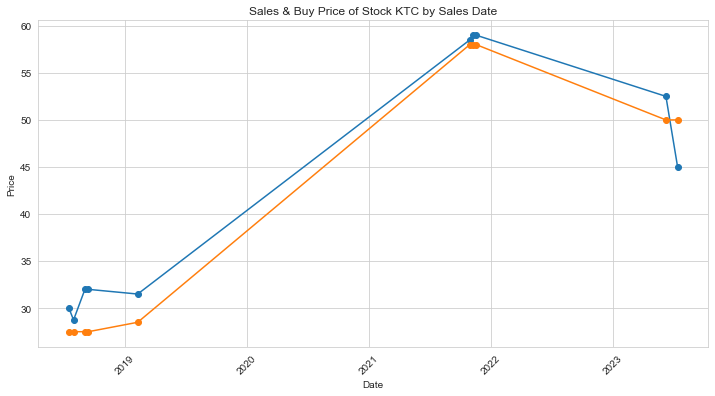

In [33]:
# Filter the sales data for the stock 'KTC'
sales_KTC = sales[sales['name'] == 'KTC']

# Calculate the sales amount by date_sell
sales_price_by_date = sales_KTC.groupby('date_sell')['price_sell'].mean()
# Calculate the buy price by date_sell
buy_price_by_date = sales_KTC.groupby('date_sell')['price_buy'].mean()
# Create a line chart of sales amount by date_sell
plt.figure(figsize=(12, 6))
plt.plot(sales_price_by_date.index, sales_price_by_date.values, marker='o', label='Sell Price')
plt.plot(sales_price_by_date.index, buy_price_by_date.values, marker='o', label='Buy Price')
plt.title('Sales & Buy Price of Stock KTC by Sales Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

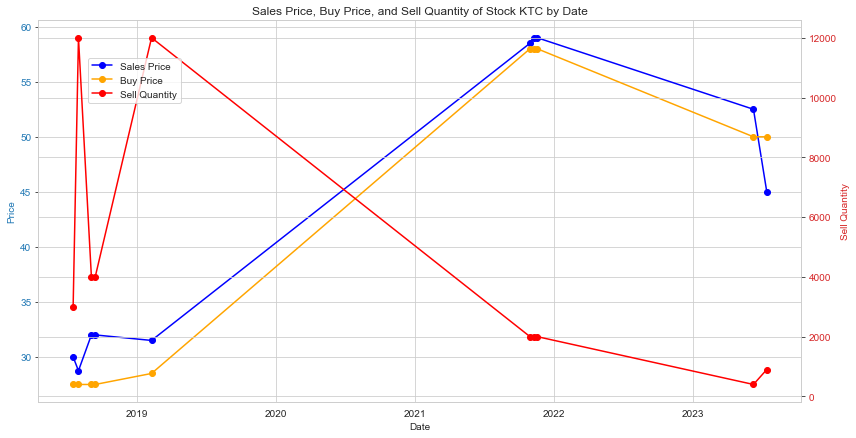

In [34]:
# Calculate the sell quantity by date_sell
sell_qty_by_date = sales_KTC.groupby('date_sell')['qty_sell'].sum()

# Create a line chart of sales amount, buy price, and sell quantity by date_sell
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color=color)
ax1.plot(sales_price_by_date.index, sales_price_by_date.values, color='blue', marker='o', label='Sales Price')
ax1.plot(buy_price_by_date.index, buy_price_by_date.values, color='orange', marker='o', label='Buy Price')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'  # we already handled the x-label with ax1
ax2.set_ylabel('Sell Quantity', color=color)  # we alrKTCdy handled the x-label with ax1
ax2.plot(sell_qty_by_date.index, sell_qty_by_date.values, color='red', marker='o', label='Sell Quantity')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Sales Price, Buy Price, and Sell Quantity of Stock KTC by Date')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

### Dividend Analysis

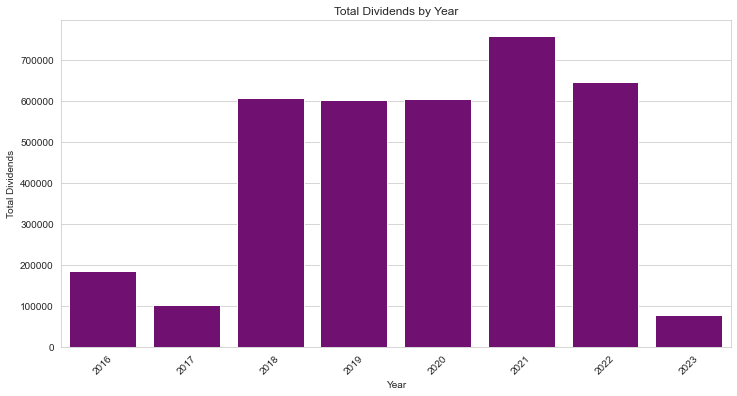

In [35]:
# Calculate the total dividends by year
dividends_by_year = dividends.groupby('year')['amt'].sum()

# Create a bar plot for the total dividends by year
plt.figure(figsize=(12, 6))
sns.barplot(x=dividends_by_year.index, y=dividends_by_year.values, color='purple')
plt.title('Total Dividends by Year')
plt.xlabel('Year')
plt.ylabel('Total Dividends')
plt.xticks(rotation=45)
plt.show()

In [36]:
dividends_by_year.to_frame()

,amt
year,
2016,"185,537.60"
2017,"102,343.50"
2018,"605,859.60"
2019,"601,462.95"
2020,"603,486.53"
2021,"758,673.21"
2022,"646,064.60"
2023,"75,874.00"


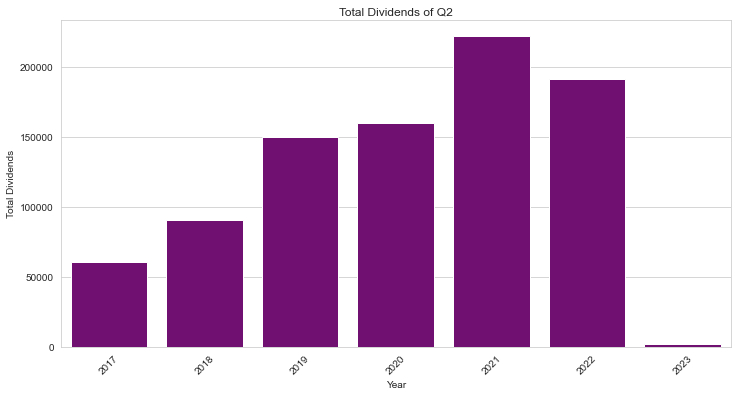

In [37]:
# Filter the dividends data for the year 2023
dividends_of_q2 = dividends[dividends['quarter'] == 2]
# Calculate the total dividends by year
dividends_by_qtr = dividends_of_q2.groupby('year')['amt'].sum()

# Create a bar plot for the total dividends by qtr
plt.figure(figsize=(12, 6))
sns.barplot(x=dividends_by_qtr.index, y=dividends_by_qtr.values, color='purple')
plt.title('Total Dividends of Q2')
plt.xlabel('Year')
plt.ylabel('Total Dividends')
plt.xticks(rotation=45)
plt.show()

In [38]:
dividends_by_qtr.to_frame()

,amt
year,
2017,"60,443.50"
2018,"90,770.00"
2019,"150,239.30"
2020,"159,687.93"
2021,"222,239.40"
2022,"191,060.60"
2023,"1,500.00"


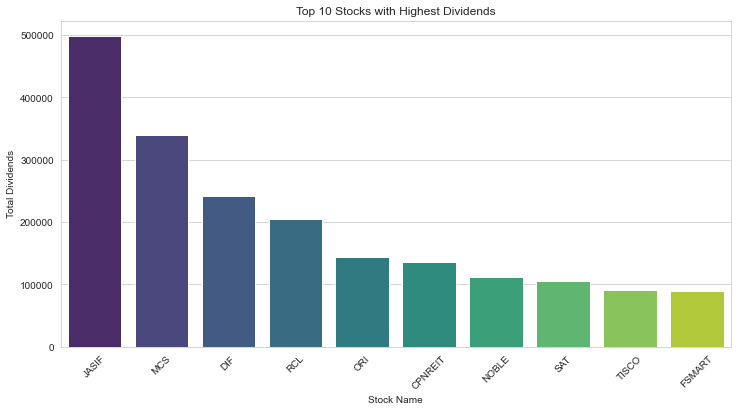

In [39]:
# Calculate the total dividends by stock
dividends_by_stock = dividends.groupby('name')['amt'].sum()

# Get the top 10 stocks with the highest dividends
top_10_dividend_stocks = dividends_by_stock.sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 stocks with the highest dividends
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_dividend_stocks.index, y=top_10_dividend_stocks.values, palette='viridis')
plt.title('Top 10 Stocks with Highest Dividends')
plt.xlabel('Stock Name')
plt.ylabel('Total Dividends')
plt.xticks(rotation=45)
plt.show()

In [40]:
type(top_10_dividend_stocks)

pandas.core.series.Series

In [41]:
top_10_dividend_stocks.to_frame()

,amt
name,
JASIF,"498,200.00"
MCS,"339,050.00"
DIF,"241,639.50"
RCL,"204,000.00"
ORI,"144,350.00"
CPNREIT,"135,443.00"
NOBLE,"112,200.00"
SAT,"105,300.00"
TISCO,"91,400.00"


In [42]:
# Calculate the total profit
total_profit = sales['profit'].sum()
formatted_amt = '{:,.2f}'.format(total_profit)
print(formatted_amt)

-321,060.92


In [43]:
# Calculate the total dividends
total_dividends = dividends['amt'].sum()
formatted_amt = '{:,.2f}'.format(total_dividends)
print(formatted_amt)

3,579,301.99


### By market

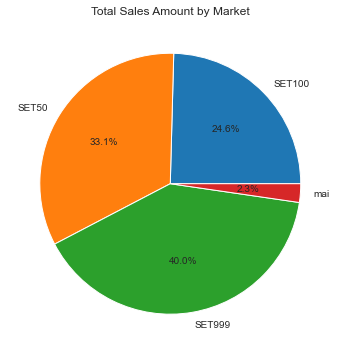

In [44]:
# Calculate the total sales amount by market
sales_amount_by_market = sales.groupby('market')['amt_sell'].sum()

# Create a pie chart of total sales amount by market
plt.figure(figsize=(10, 6))
plt.pie(sales_amount_by_market, labels=sales_amount_by_market.index, autopct='%1.1f%%')
plt.title('Total Sales Amount by Market')
plt.show()

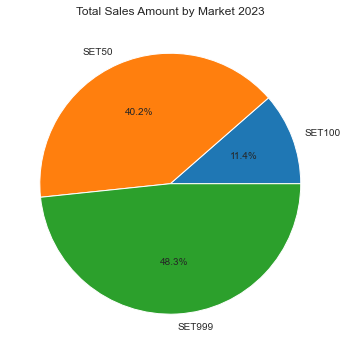

In [45]:
# Filter the sales data for the year 2023
sales_2023 = sales[sales['year_sell'] == 2023]
# Calculate the total sales amount by market
sales_amount_by_market_2023 = sales_2023.groupby('market')['amt_sell'].sum()

# Create a pie chart of total sales amount by market
plt.figure(figsize=(10, 6))
plt.pie(sales_amount_by_market_2023, labels=sales_amount_by_market_2023.index, autopct='%1.1f%%')
plt.title('Total Sales Amount by Market 2023')
plt.show()

In [46]:
df = pd.concat([dividends_by_year, total_profit_by_year],axis=1,keys=['dividend','profit'])
df           

,dividend,profit
2016,"185,537.60",NaN
2017,"102,343.50","772,818.01"
2018,"605,859.60","223,705.73"
2019,"601,462.95","11,250.02"
2020,"603,486.53","-1,428,227.86"
2021,"758,673.21","520,814.94"
2022,"646,064.60","-201,413.37"
2023,"75,874.00","-220,008.39"
